# FDA_pratice ( Part 2 )
> Contributed by `shihyuuuuuuu`<br>

## Description
[HW1 requirements](https://github.com/silenceliang/FDA_practice/blob/master/README.md#3-plot-pandas-series-dataframe-time-date)
<br>This notebook is a practice for course "Fundamental of Data Analytics".<br>
For part 2, I do some statistical analysis on a Kaggle dataset '[Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)'.<br>

## Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
data = pd.read_csv('data/google-play-store-apps/googleplaystore.csv')

# Drop strange data
data = data.drop(index=10472)
data = data.reset_index(drop=True)

## Dataset columns description

- **App**: Application name
- **Category**: Category the app belongs to
- **Rating**: Overall user rating of the app (as when scraped)
- **Reviews**: Number of user reviews for the app (as when scraped)
- **Size**: Size of the app (as when scraped)
- **Installs**: Number of user downloads/installs for the app (as when scraped)
- **Type**: Paid or Free
- **Price**: Price of the app (as when scraped)
- **Content Rating**: Age group the app is targeted at - Children / Mature 21+ / Adult
- **Genres**: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- **Last Updated**: Date when the app was last updated on Play Store (as when scraped)
- **Current Ver**: Current version of the app available on Play Store (as when scraped)
- **Android Ver**: Min required Android version (as when scraped)

## A glimpse of the dataset

Each app (row) has values for category, rating, reviews, size, and more.

In [2]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10840, 13)

## Statistical Analysis

### Overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Category

Find out the categories with the most apps.

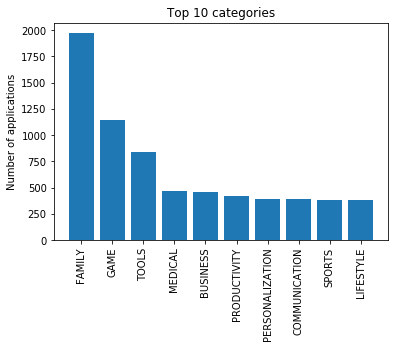

In [5]:
# Ten categories with the most apps
category_count = data['Category'].value_counts()[:10]
plt.xticks(rotation='vertical')
plt.bar(category_count.index, category_count)
plt.ylabel('Number of applications')
plt.title('Top 10 categories')
plt.show()

### Rating

If the rate is 'NAN', I encoded it as '-1'.

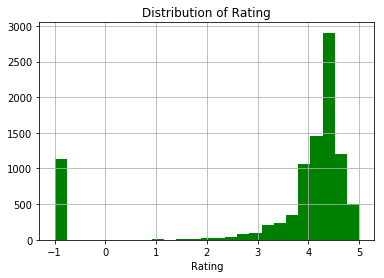

In [6]:
# Histogram of the rates
rates = []
for rate, i in zip(data['Rating'], range(data['Rating'].count())):
    if math.isnan(rate):
        rates.append(-1.0)
    else:
        rates.append(rate)
plt.grid()
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.hist(rates, bins=25, color='green')
plt.show()

### Reviews
When I listed the Apps with the most reviews, I found that there are many repeated Apps (with different Reviews).

In [7]:
# Sort the data descendingly by 'Reviews'
sorted_reviews = data['Reviews'].astype('int64').sort_values(ascending=False)
for i in sorted_reviews.index[0:10]:
    print(data.loc[i].Reviews, '\t', data.loc[i].App)

78158306 	 Facebook
78128208 	 Facebook
69119316 	 WhatsApp Messenger
69119316 	 WhatsApp Messenger
69109672 	 WhatsApp Messenger
66577446 	 Instagram
66577313 	 Instagram
66577313 	 Instagram
66509917 	 Instagram
56646578 	 Messenger – Text and Video Chat for Free


**Find the rows with repeated App name, and delete them from the data.**

In [8]:
del_index = []
for i in data.groupby(['App']).__iter__():
    if i[1].shape[0] > 1:
        for j in i[1].index[1:]:
            del_index.append(j)
            
# Drop the repeated rows            
for index in del_index:
    data = data.drop(index=index)
# Then reset the index
data = data.reset_index(drop=True)

print('Now data shape: ', data.shape)

Now data shape:  (9659, 13)


**Then print the apps with the most 'Reviews' again.**

In [9]:
data['Reviews'] = data['Reviews'].astype('int64')
sorted_reviews = data['Reviews'].sort_values(ascending=False)
top_reviews = []
top_reviews.append([])
top_reviews.append([])
for i in sorted_reviews.index[0:10]:
    print(data.loc[i].Reviews, '\t',  data.loc[i].App)
    top_reviews[0].append(data.loc[i].App)
    top_reviews[1].append(int(data.loc[i].Reviews))


78158306 	 Facebook
69119316 	 WhatsApp Messenger
66577313 	 Instagram
56642847 	 Messenger – Text and Video Chat for Free
44891723 	 Clash of Clans
42916526 	 Clean Master- Space Cleaner & Antivirus
27722264 	 Subway Surfers
25655305 	 YouTube
24900999 	 Security Master - Antivirus, VPN, AppLock, Booster
23133508 	 Clash Royale


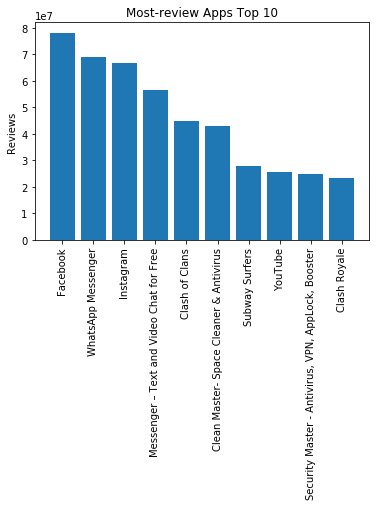

In [10]:
# Ten most reviews
plt.bar(top_reviews[0], top_reviews[1])
plt.ylabel('Reviews')
plt.xticks(rotation='vertical')
plt.title('Most-review Apps Top 10')
plt.show()

### Installs
Because the type of the 'Installs' column is 'str', I need to covert it to 'int'.
<br>
Steps:
1. Remove ',' and '+' in the strings
2. Convert from string to integer

In [11]:
# Initial data format
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [12]:
data['Installs'] =  data['Installs'].str.replace('+', '')
data['Installs'] =  data['Installs'].str.replace(',', '')
data['Installs'] =  data['Installs'].astype('int64')

In [13]:
sorted_installs = data['Installs'].sort_values(ascending=False)
print('Installs\t Reviews\t App\n')
for i in sorted_installs.index[0:15]:
    print(data.loc[i].Installs, '\t', data.loc[i].Reviews, '\t',  data.loc[i].App)

Installs	 Reviews	 App

1000000000 	 27722264 	 Subway Surfers
1000000000 	 8033493 	 Google
1000000000 	 7165362 	 Google Play Games
1000000000 	 78158306 	 Facebook
1000000000 	 66577313 	 Instagram
1000000000 	 10484169 	 Skype - free IM & video calls
1000000000 	 877635 	 Google News
1000000000 	 9235155 	 Maps - Navigate & Explore
1000000000 	 25655305 	 YouTube
1000000000 	 4604324 	 Gmail
1000000000 	 10858556 	 Google Photos
1000000000 	 3419249 	 Hangouts
1000000000 	 2129689 	 Google Street View
1000000000 	 906384 	 Google Play Movies & TV
1000000000 	 1433233 	 Google Play Books


### Last Updated

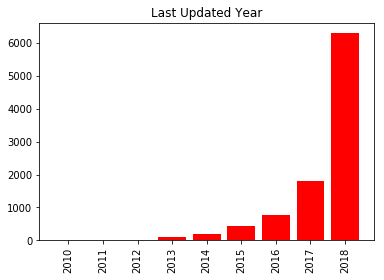

In [14]:
from datetime import datetime
import time

dt_dates = []
for date, i in zip(data['Last Updated'], range(data['Last Updated'].size)):
    dt_dates.append(datetime.strptime(date, '%B %d, %Y'))

month_group = []
for date in dt_dates:
    month_group.append(date.strftime('%Y'))
months = pd.DataFrame(month_group)
group = months.groupby(0)

# Plot a bar chart. x_axis = 'Year', y_axis = 'review-count'
plt.bar(group.size().index, group.size(), color='red')
plt.title('Last Updated Year')
plt.xticks(rotation='vertical')
plt.show()

## Comparison between attributes

### Correlation coefficients between attributes (Reviews, Installs, Rating, Price)

I found that there is some correlation between 'Reviews' and 'Installs'.

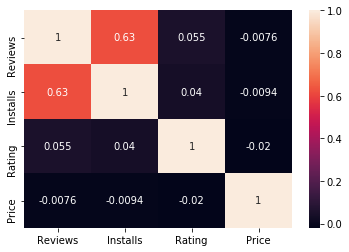

In [15]:
import seaborn as sns

data['Price'] =  data['Price'].str.replace('$', '')
data['Price'] = data['Price'].astype('float64')
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
correlation = np.corrcoef([data['Reviews'], data['Installs'], data['Rating'], data['Price']])
#print(correlation)

# Create new dataframe by the correlation matrix
df = pd.DataFrame(correlation)
df.columns = ['Reviews', 'Installs', 'Rating', 'Price']
df.index = ['Reviews', 'Installs', 'Rating', 'Price']

# Draw a heatmap of the dataframe
sns.heatmap(df, annot=True)

### Categories and Average Installs
Computing the average installs of each categories, we can find out what kinds of apps are more popular.

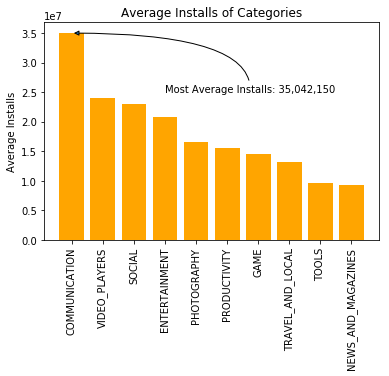

In [16]:
category_installs = []
for i in data.groupby(['Category']).__iter__():
    category_installs.append([i[0], np.mean(i[1].Installs)])

cate_inst = pd.DataFrame(category_installs)
cate_inst = cate_inst.sort_values(by=[1], ascending=False)
plt.bar(height=cate_inst.iloc[:10][1],align='center', x=cate_inst.iloc[:10][0], color='orange')

plt.xticks(rotation='vertical')
plt.annotate('Most Average Installs: 35,042,150', xy=('COMMUNICATION', 3.5*(10**7)), xytext=('ENTERTAINMENT', 2.5*10**7),arrowprops={'arrowstyle':'-|>', 'connectionstyle': "angle3,angleA=90,angleB=0"})
plt.ylabel('Average Installs')
plt.title('Average Installs of Categories')
plt.show()